In [67]:
import numpy as np
from collections import Counter
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

%matplotlib inline

* https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained (원문)
* http://celinachild.cafe24.com/?p=1114 (번역)

In [80]:
meta={0:9,1:78,2:305,3:752,4:1150,5:1166,6:899,7:460,8:644,9:533,10:504}
data = []

for x,f in meta.items():
    temp = [x]*f
    data.extend(temp)

In [82]:
data.sort()

### Observed Distribution 

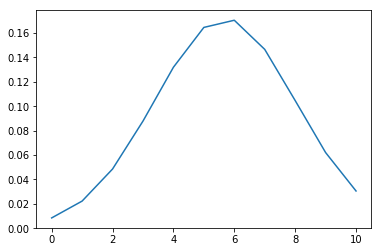

In [262]:
observed_for_plot = stats.norm.pdf(data, np.mean(data), np.std(data))  
plt.plot(data, observed_for_plot)

In [240]:
prob_dict = {x:c/len(list(data)) for x,c in meta.items()}
observed = np.array(list(prob_dict.values()))

### Uniform 

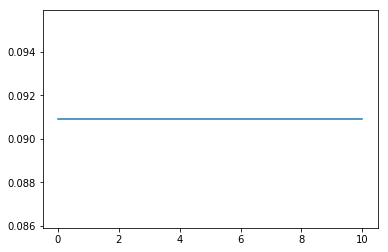

In [239]:
x = list(meta.keys())
uniform = np.asarray([1/len(x) for c in x])
plt.plot(x,uniform_for_plot)

### Binomial

In [130]:
np.mean(data)

5.688769230769231

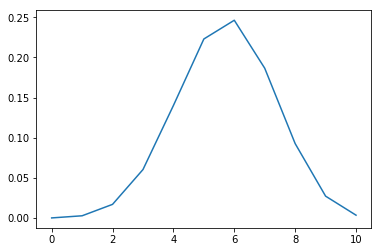

In [251]:
binom_for_plot = stats.binom.pmf(data,10,0.57)  
plt.plot(data, binom_for_plot)

In [244]:
import itertools
import math

In [253]:
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

In [255]:
binom=[]

for k in range(11):
    p = nCr(10,k)*(0.57**k)*((1-0.57)**(10-k))
    binom.append(p)

In [257]:
binom = np.asarray(binom)

## Entropy 

In [210]:
def entropy(labels):
    labels = list(labels)
    counter = Counter(labels)
    prob_dict = {x:c/len(labels) for x,c in counter.items()}
    probs = np.array(list(prob_dict.values()))

    return - probs.dot(np.log2(probs))

In [211]:
entropy(data)

3.121065569453374

## KL Divergence

In [221]:
def KLD(p,q):
    #return p.dot(np.log2(p/q))
    return np.sum(np.where(p != 0, p*np.log2(p / q), 0))

어떤 분포(Uniform vs Binomial)가 원래 데이터를 더욱 잘 encoding(정보 손실 더 적은) 했다고 볼까?

In [258]:
KLD(observed,uniform)

0.33836604918392338

In [260]:
KLD(observed,binom)

0.47694143790065852

uniform의 정보 손실이 binomial보다 적다. 즉 uniform이 낫다

#### Divergence not distance

교환법칙이 성립하지 않음

In [261]:
KLD(binom,observed)

0.33213867656974821